In [1]:
from src.funcs import *

In [2]:
# 初始化对象
vbh = VaidyaBlackHole()

In [3]:
# 吸积率 0 ~ 0.0625
mu = 3e-2
# 更新mu
vbh.update_mu(mu)

# 观测者倾角 [D]
theta0 = 0
# 更新theta0
vbh.update_theta0(theta0)

### $\gamma_{\max}$随$b$的变化关系图

In [4]:
b = np.linspace(0,15,100)
nth = np.zeros_like(b)
for idx in np.arange(len(b)):
    if b[idx]<vbh.bph:
        nth[idx] = vbh.get_gamma_max(b[idx]) / (2*np.pi)
    else:
        nth[idx] = vbh.get_gamma_max(b[idx]) / (np.pi)
idx0 = np.argwhere(nth >= 3/4)
b00 = np.floor(b[idx0[0,0]-1])
b01 = np.ceil(b[idx0[-1,0]+1])

/Users/washy/Library/CloudStorage/OneDrive-个人/01_研究工作/03_理论物理_Vaidya黑洞阴影/02_相关代码/github/IVBH/src/funcs.py:221: RuntimeWarning: divide by zero encountered in scalar divide
  return 2 * self.m0 * uc**3 - uc**2 + 2 * uc / self.r0 + 1 / b**2


In [5]:
b = np.linspace(0,b00,100)
b = np.append(b, np.linspace(b00,b01,5000))
if b01<10:
    b = np.append(b, np.linspace(b01,10,100))
# gamma_max = np.zeros_like(b)
nth = np.zeros_like(b)
for idx in np.arange(len(b)):
    if b[idx]<vbh.bph:
        nth[idx] = vbh.get_gamma_max(b[idx]) / (2*np.pi)
    else:
        nth[idx] = vbh.get_gamma_max(b[idx]) / (np.pi)
# 计算3/4 pi和5/4 pi的索引
idx1 = np.argwhere(nth >= 3/4)
idx2 = np.argwhere(nth >= 5/4)

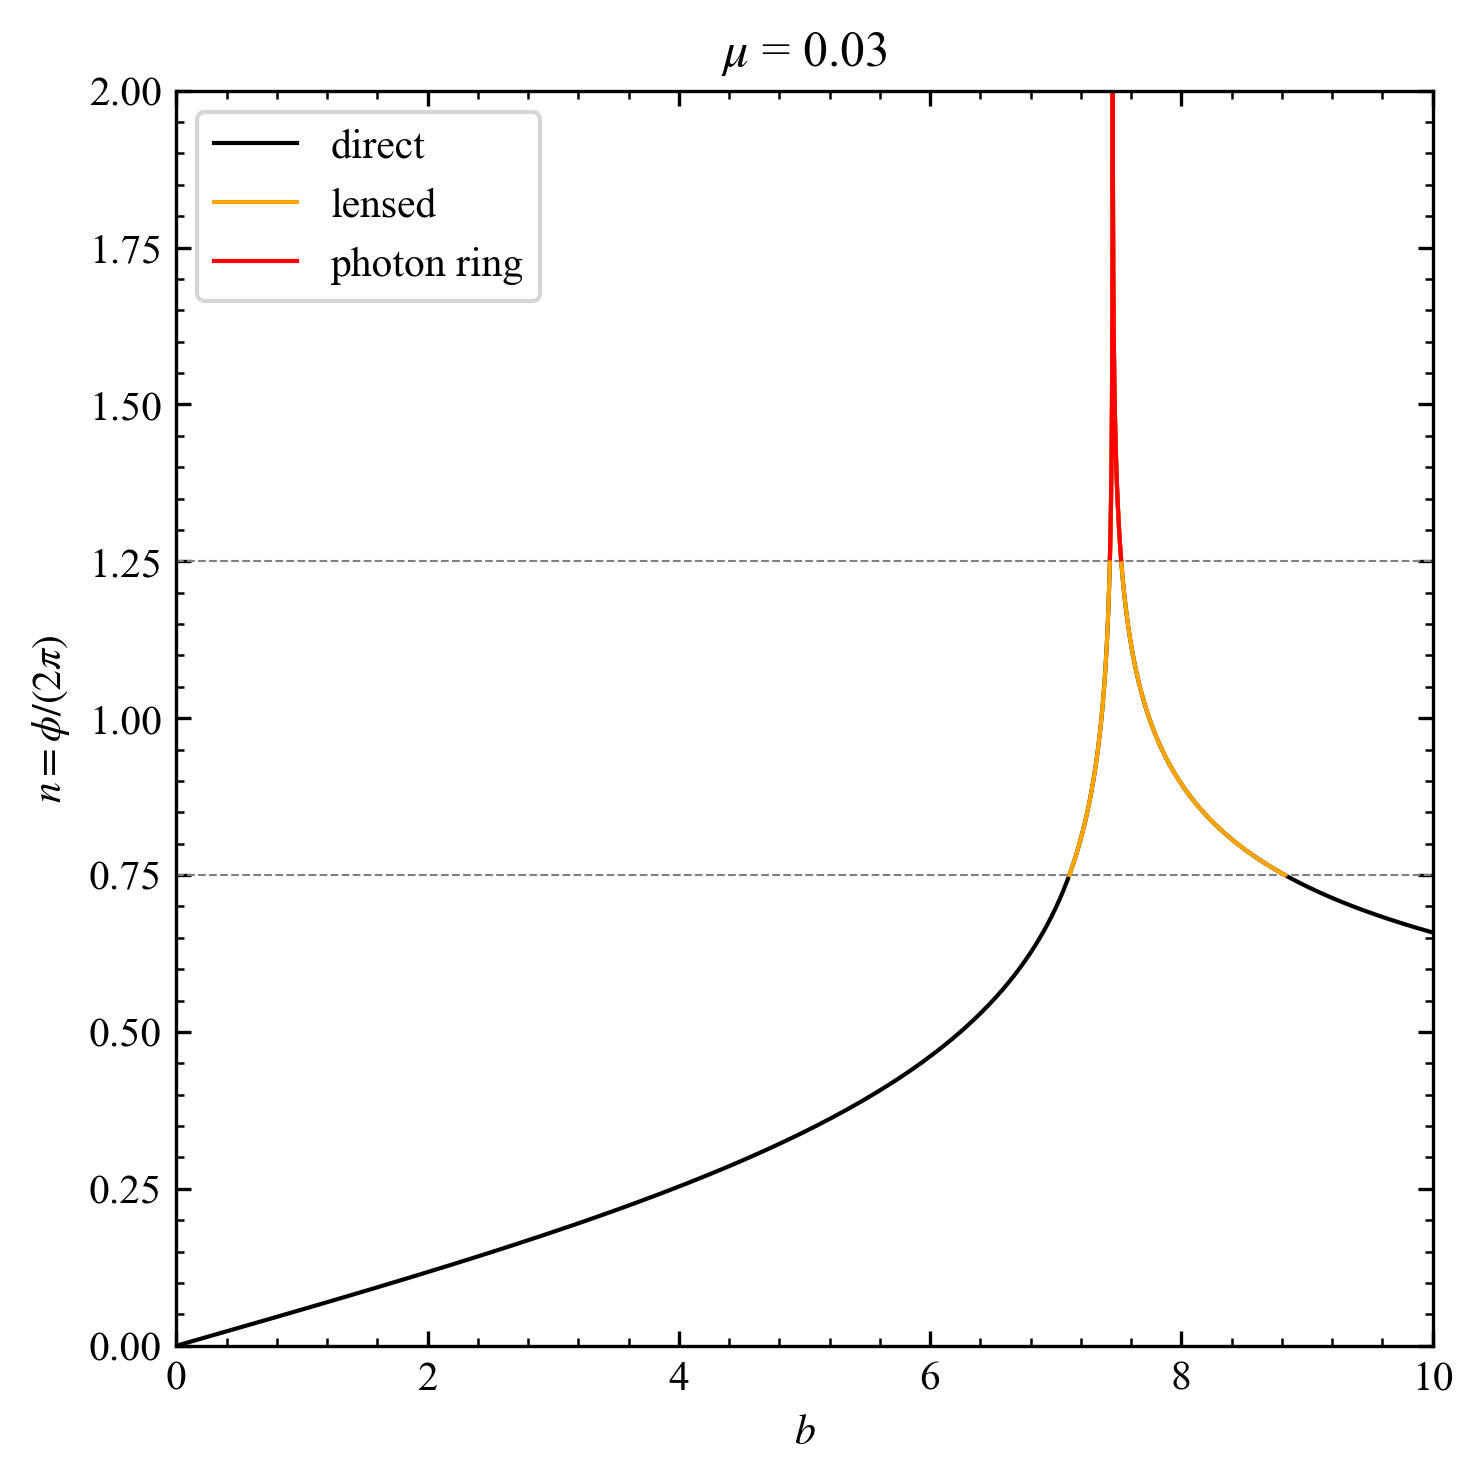

In [6]:
plt.figure(figsize=(4.8,4.8),dpi=300)

plt.plot(b, nth, 'k', label="direct", lw=1)

plt.plot([0,b[-1]], [3/4,3/4], '--', color='gray', lw=0.5)
plt.plot([0,b[-1]], [5/4,5/4], '--', color='gray', lw=0.5)

plt.plot(b[idx1[0][0]:idx1[-1][0]], nth[idx1[0][0]:idx1[-1][0]], color="orange", label="lensed",lw=1)
plt.plot(b[idx2[0][0]:idx2[-1][0]], nth[idx2[0][0]:idx2[-1][0]], color="red", label="photon ring",lw=1)

plt.legend()

# 显示四周坐标刻度
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
# 设置副坐标刻度间隔
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.4))
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.05))
# xy主坐标刻度朝内
plt.gca().tick_params(axis="both", which="major", direction="in")
# xy副坐标刻度朝内
plt.gca().tick_params(axis="both", which="minor", direction="in")

plt.xlim(0,b[-1])
plt.ylim(0,2.)
plt.xlabel(r'$b$')
plt.ylabel(r'$n = \phi / (2\pi)$')
plt.title(r"$\mu$ = " + "%.2f"%vbh.mu)

# 调整子图参数 - 使其充满整个画布
plt.tight_layout(pad=.2)

# plt.show()
# plt.savefig('imgs/c_nth_b_mu_%.1e.png'%vbh.mu)

### 不同冲击参数光线的运动轨迹

In [7]:
# 边界处的冲击参数
b1 = b[idx1[0][0]]
b2 = b[idx2[0][0]]
b3 = b[idx2[-1][0]]
b4 = b[idx1[-1][0]]
b1,b2,b3,b4

(np.float64(7.109021804360872),
 np.float64(7.431886377275455),
 np.float64(7.521304260852171),
 np.float64(8.824764952990598))

/Users/washy/Library/CloudStorage/OneDrive-个人/01_研究工作/03_理论物理_Vaidya黑洞阴影/02_相关代码/github/IVBH/src/funcs.py:197: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(Rnear**3 / (Rnear - 2*self.m0 - 2*Rnear**2/self.r0))


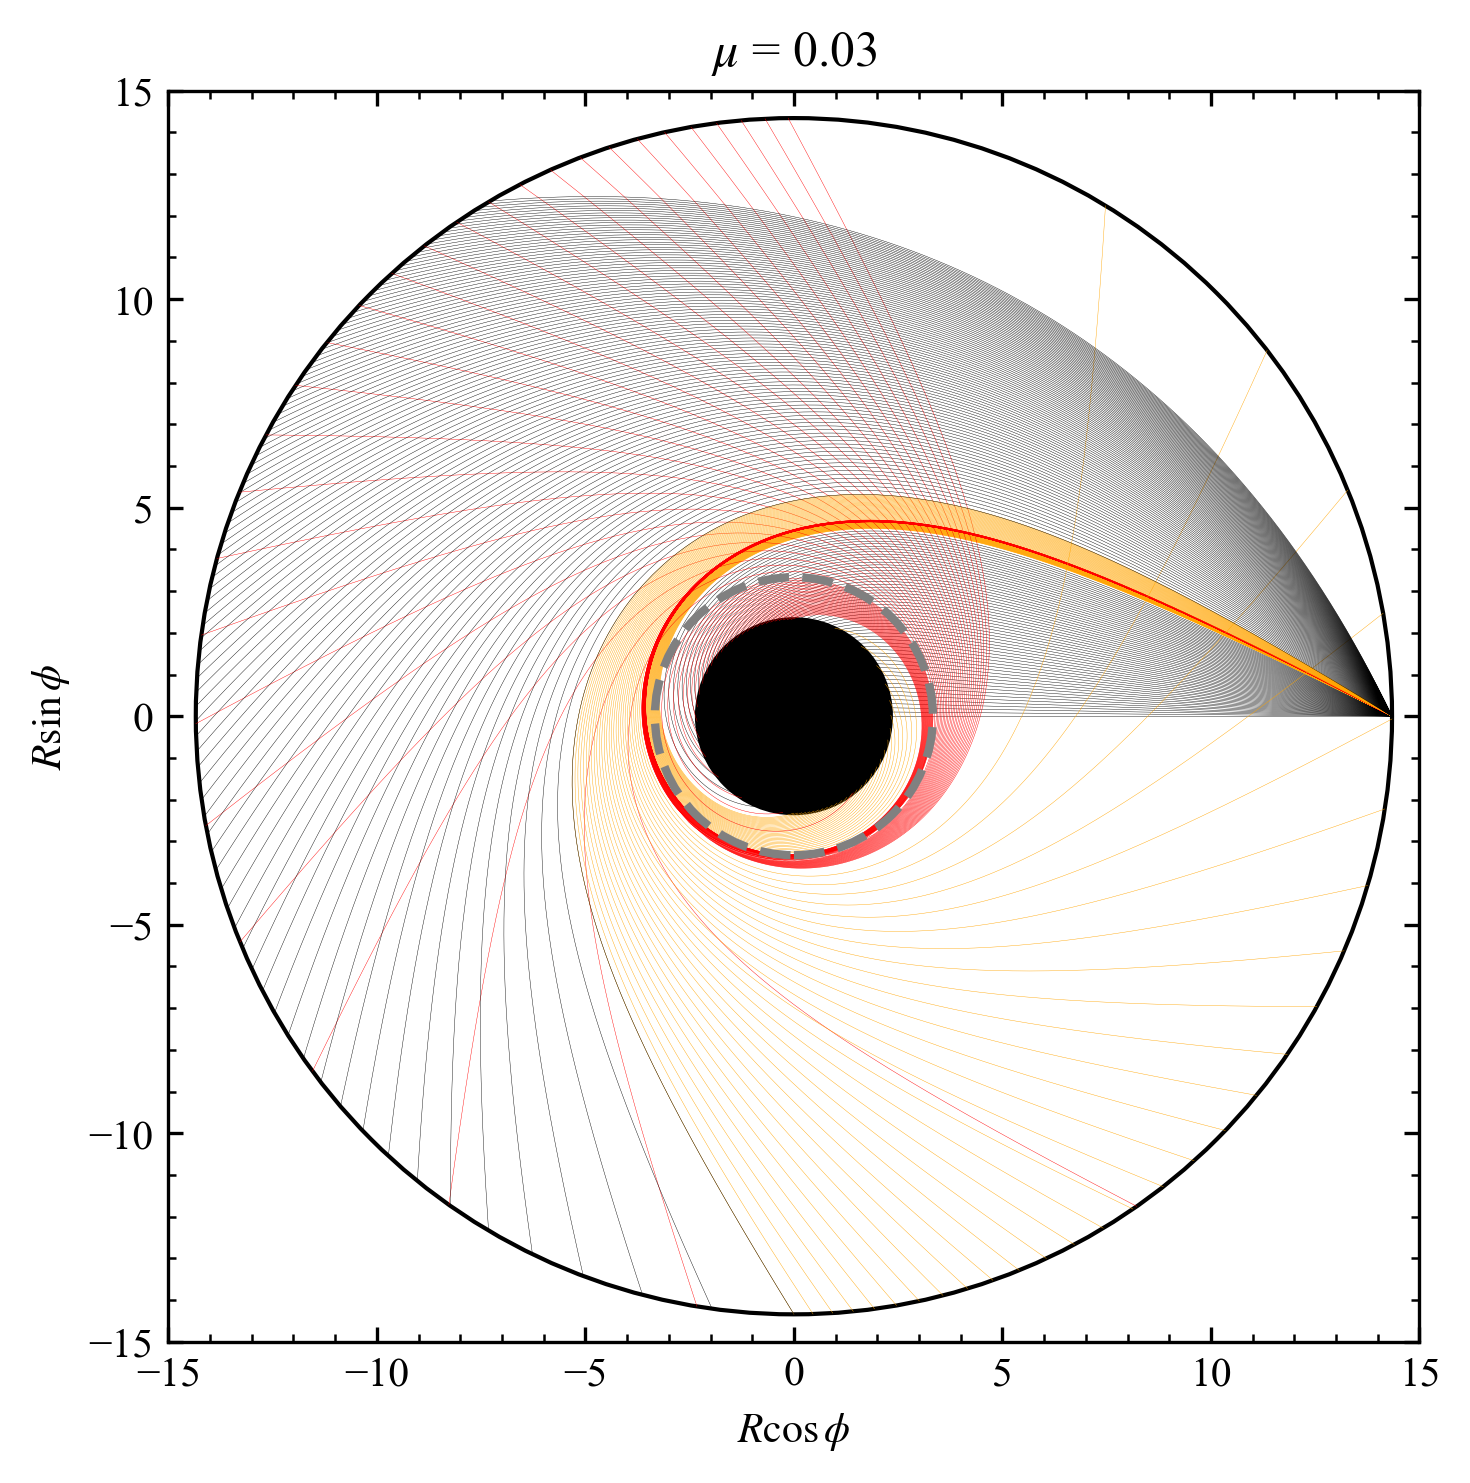

In [8]:
plt.figure(figsize=(4.8,4.8),dpi=300)

c = Circle(xy=(0,0), radius=vbh.Rp, alpha=1, fill=False, color='black')
plt.gca().add_patch(c)
c = Circle(xy=(0,0), radius=vbh.Rph, alpha=1, fill=False, color='gray', lw=2, linestyle='--', zorder=10)
plt.gca().add_patch(c)
c = Circle(xy=(0,0), radius=vbh.Rm, alpha=1, color='black')
plt.gca().add_patch(c)

lw = .1

b = np.linspace(0,b1,60)
for idx in np.arange(len(b)-1):
    uc,gamma = vbh.get_gamma_all(b[idx])
    plt.plot(1/uc*np.cos(gamma), 1/uc*np.sin(gamma), color="k", lw=lw)

b = np.linspace(b1,b2,30)
for idx in np.arange(len(b)-1):
    uc,gamma = vbh.get_gamma_all(b[idx])
    plt.plot(1/uc*np.cos(gamma), 1/uc*np.sin(gamma), color="orange", lw=lw)

b = np.linspace(b2,vbh.bph,30)
for idx in np.arange(len(b)-1):
    uc,gamma = vbh.get_gamma_all(b[idx])
    plt.plot(1/uc*np.cos(gamma), 1/uc*np.sin(gamma), color="red", lw=lw)

b = np.linspace(vbh.bph,b3,30)
for idx in np.arange(len(b)-1):
    uc,gamma = vbh.get_gamma_all(b[idx+1])
    plt.plot(1/uc*np.cos(gamma), 1/uc*np.sin(gamma), color="red", lw=lw)

b = np.linspace(b3,b4,30)
for idx in np.arange(len(b)-1):
    uc,gamma = vbh.get_gamma_all(b[idx+1])
    plt.plot(1/uc*np.cos(gamma), 1/uc*np.sin(gamma), color="orange", lw=lw)

b = np.linspace(b4,30,100)
for idx in np.arange(len(b)):
    uc,gamma = vbh.get_gamma_all(b[idx])
    plt.plot(1/uc*np.cos(gamma), 1/uc*np.sin(gamma), color="k", lw=lw)

# 显示四周坐标刻度
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
# 设置副坐标刻度间隔
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
# xy主坐标刻度朝内
plt.gca().tick_params(axis="both", which="major", direction="in")
# xy副坐标刻度朝内
plt.gca().tick_params(axis="both", which="minor", direction="in")

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel(r'$R \cos \phi$')
plt.ylabel(r'$R \sin \phi$')
plt.title(r"$\mu$ = " + "%.2f"%vbh.mu)
plt.gca().set_aspect('equal', adjustable='box')

# 调整子图参数 - 使其充满整个画布
plt.tight_layout(pad=.2)

plt.show()
# plt.savefig('imgs/c_nth_trajectories_mu_%.1e.png'%vbh.mu)